In [1]:
suppressMessages(library(ggplot2))
suppressMessages(library(dplyr))
suppressMessages(library(ComplexHeatmap))
suppressMessages(library(circlize))

In [2]:
sample_list = c('HC01', 'HC02', 'HC03', 'HC05',
               'SSc4994', 
               'SSc5380', 
                'SSc-HL01', 'SSc-HL05', 'SSc-HL06', 'SSc-HL11',
                'SSc-HL13', 'SSc-HL25', 'SSc-HL33', 'SSc-HL35')

In [3]:
fib_list <- c("Fib1", "Fib2", "Fib3", "Fib4", "Fib5", "Fib6", "Fib7", "Fib8", "Fib9", "Fib10")
fib_list <- c("Fib1", "Fib2", "Fib9")

In [4]:
in_dir = '../../results/05_fibroblast/10_misty'

In [5]:
# df_res <- lapply(sample_list, function(sample){
#     df <- read.csv(glue::glue("{in_dir}/{sample}_fib.csv"), row.names = 1)
#     df$sample <- sample
    
#     return(df)
# }) %>% do.call(rbind, .) %>%
#     dplyr::group_by(target, predictor, view) %>%
#     dplyr::summarise(median_importances = median(importances))

In [6]:
# options(repr.plot.height = 4, repr.plot.width = 4.5)

# df_plot <- subset(df_res, view == "intra") %>%
#     dplyr::select(-view) %>%
#     tidyr::pivot_wider(names_from=target, values_from=median_importances) %>%
#     tibble::column_to_rownames(var="predictor")

# df_plot <- df_plot[fib_list, fib_list]
# df_plot[is.na(df_plot)] <- 0

# col_fun <- colorRamp2(seq(from = 0, to = max(df_plot), length = 9), 
#                      RColorBrewer::brewer.pal(name = "BuGn", n = 9))

# ht <- Heatmap(as.matrix(df_plot), 
#               cluster_columns = FALSE, 
#               cluster_rows = FALSE,
#                rect_gp = gpar(col = "black", lwd = 0.2),
#                heatmap_legend_param = list(
#                title = "median importance",
#                title_position = "leftcenter-rot",
#               legend_height = unit(3, "cm")),
#               col = col_fun,
#               na_col = "white",
#              row_names_side = "left")

# draw(ht)

In [7]:
# options(repr.plot.height = 4, repr.plot.width = 4.5)

# df_plot <- subset(df_res, view == "juxta") %>%
#     dplyr::select(-view) %>%
#     tidyr::pivot_wider(names_from=target, values_from=median_importances) %>%
#     tibble::column_to_rownames(var="predictor")

# df_plot <- df_plot[fib_list, fib_list]
# df_plot[is.na(df_plot)] <- 0

# col_fun <- colorRamp2(seq(from = 0, to = max(df_plot), length = 9), 
#                      RColorBrewer::brewer.pal(name = "BuGn", n = 9))

# ht <- Heatmap(as.matrix(df_plot), 
#               cluster_columns = FALSE, 
#               cluster_rows = FALSE,
#                rect_gp = gpar(col = "black", lwd = 0.2),
#                heatmap_legend_param = list(
#                title = "median importance",
#                title_position = "leftcenter-rot",
#               legend_height = unit(3, "cm")),
#               col = col_fun,
#               na_col = "white",
#              row_names_side = "left")

# draw(ht)

In [8]:
# options(repr.plot.height = 4, repr.plot.width = 4.5)

# df_plot <- subset(df_res, view == "para") %>%
#     dplyr::select(-view) %>%
#     tidyr::pivot_wider(names_from=target, values_from=median_importances) %>%
#     tibble::column_to_rownames(var="predictor")

# df_plot <- df_plot[fib_list, fib_list]
# df_plot[is.na(df_plot)] <- 0

# col_fun <- colorRamp2(seq(from = 0, to = max(df_plot), length = 9), 
#                      RColorBrewer::brewer.pal(name = "BuGn", n = 9))

# ht <- Heatmap(as.matrix(df_plot), 
#               cluster_columns = FALSE, 
#               cluster_rows = FALSE,
#                rect_gp = gpar(col = "black", lwd = 0.2),
#                heatmap_legend_param = list(
#                title = "median importance",
#                title_position = "leftcenter-rot",
#               legend_height = unit(3, "cm")),
#               col = col_fun,
#               na_col = "white",
#              row_names_side = "left")

# draw(ht)

In [9]:
# sel_cell_types = c('B cells', 'Endothelial', 'Keratinocytes', 'Langerhans cells',
#                   'Macrophages', 'Mast cells', 'Melanocytes', 'Monocytes', 'NK cells',
#                   'Neural', 'Pericytes', 'Plasma cells', 'Smooth Muscle', 'T cells', 'cDC', 'pDC')

sel_cell_types = c('B cells', 'Endothelial', 'Langerhans cells',
                  'Macrophages', 'Mast cells', 'Melanocytes', 'Monocytes', 'NK cells',
                  'Neural', 'Pericytes', 'Plasma cells', 'Smooth Muscle', 'T cells', 'cDC', 'pDC')

In [10]:
df_res <- lapply(sample_list, function(sample){
    df <- read.csv(glue::glue("{in_dir}/{sample}_cell_type.csv"), row.names = 1)
    df$sample <- sample
    
    return(df)
}) %>% do.call(rbind, .) %>%
    dplyr::group_by(target, predictor, view) %>%
    dplyr::summarise(importances = mean(importances))

`summarise()` has grouped output by 'target', 'predictor'. You can override
using the `.groups` argument.


In [11]:
unique(df_res$view)

[1] "juxta" "para"  "intra"

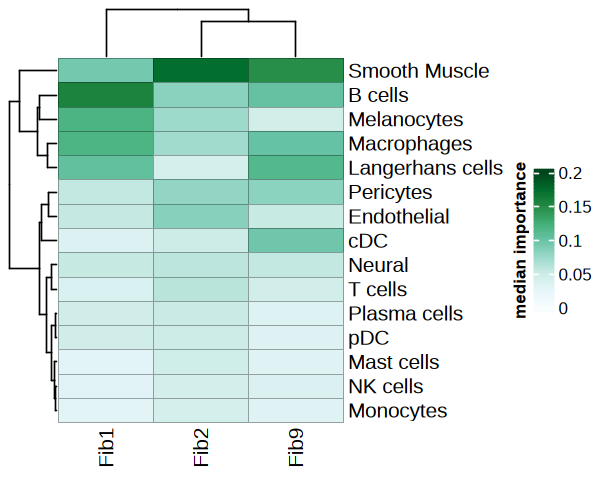

In [14]:
options(repr.plot.height = 4, repr.plot.width = 5)

df_plot <- subset(df_res, view == "juxta") %>%
   dplyr::select(-view) %>%
   tidyr::pivot_wider(names_from=target, values_from=importances) %>%
   tibble::column_to_rownames(var="predictor")

df_plot <- df_plot[, fib_list]

col_fun <- colorRamp2(seq(from = 0, to = 0.2, length = 9), 
                     RColorBrewer::brewer.pal(name = "BuGn", n = 9))

ht <- Heatmap(as.matrix(df_plot), 
              cluster_columns = TRUE, 
              cluster_rows = TRUE,
               rect_gp = gpar(col = "black", lwd = 0.2),
               heatmap_legend_param = list(
               title = "median importance",
               title_position = "leftcenter-rot",
              legend_height = unit(3, "cm")),
              col = col_fun,
              na_col = "white",
             row_names_side = "right")

draw(ht)

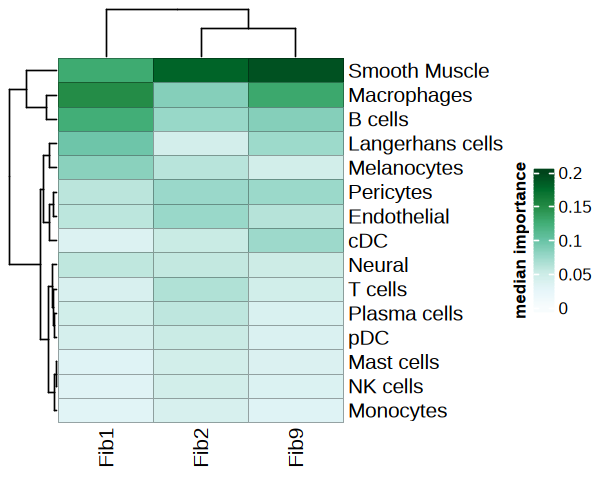

In [15]:
options(repr.plot.height = 4, repr.plot.width = 5)

df_plot <- subset(df_res, view == "para") %>%
   dplyr::select(-view) %>%
   tidyr::pivot_wider(names_from=target, values_from=importances) %>%
   tibble::column_to_rownames(var="predictor")

df_plot <- df_plot[, fib_list]

col_fun <- colorRamp2(seq(from = 0, to = 0.2, length = 9), 
                     RColorBrewer::brewer.pal(name = "BuGn", n = 9))

ht <- Heatmap(as.matrix(df_plot), 
              cluster_columns = TRUE, 
              cluster_rows = TRUE,
               rect_gp = gpar(col = "black", lwd = 0.2),
               heatmap_legend_param = list(
               title = "median importance",
               title_position = "leftcenter-rot",
              legend_height = unit(3, "cm")),
              col = col_fun,
              na_col = "white",
              row_names_side = "right")

draw(ht)